In [38]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot data to see what's in the DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(
    df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d',
                    'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']]
)

In [7]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    market_data_scaled,
    columns=['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d',
                    'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']
)

# Copy the crypto names from the original DataFrame
df_market_data_scaled["coin_id"] = df_market_data.index

# Set the coin_id column as index
df_market_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display the scaled DataFrame
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [9]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)

C:\Users\jenni\anaconda3\envs\dev3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jenni\anaconda3\envs\dev3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jenni\anaconda3\envs\dev3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jenni\anaconda3\envs\dev3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

In [10]:
# Created dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Created DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

df_elbow.head()

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051


In [11]:
# Plot of line chart with all the inertia values computed with
# different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer to question: 

**Question:** What is the best value for `k`?

**Answer:** k = 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [12]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [13]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_market_data_scaled)

C:\Users\jenni\anaconda3\envs\dev3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
crypto_clusters = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(crypto_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [15]:
# Create a copy of the scaled DataFrame
df_market_predictions = df_market_data_scaled.copy()

In [40]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_predictions['cluster'] = crypto_clusters

# Display the copy of the scaled DataFrame
df_market_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_clusters,cluster
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2,2


In [17]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_market_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    hover_cols = ["coin_id"], 
    title = "Scatter Plot by Cryptocurrency Segment - k=4"
)

:NdOverlay   [crypto_clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [19]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
crypto_pca_data = pca.fit_transform(df_market_predictions)

# View the scaled PCA data
crypto_pca_data[:5]

array([[ 0.44890795, -1.24537573, -0.8506404 ],
       [ 0.49536709, -0.899823  , -1.31755943],
       [-0.81884571,  0.07189909,  0.69501507],
       [-0.84035711,  0.08005407,  0.54435952],
       [ 0.81324004, -2.66952035, -1.64332113]])

In [20]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.34871677, 0.31363391, 0.22627118])

#### Answer the question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The principal components explain approximately 34.87%, 31.36%, and 22.63% of the total variance in the dataset.
Total, the two components capture about 88.86% of the variance in the data.  This indicates a reasonable dimensonality reduction while maintaining a high amount of explained variance. 

In [21]:
# Create new DataFrame with the PCA data.
df_crypto_pca = pd.DataFrame(crypto_pca_data, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original scaled DataFrame
df_crypto_pca["coin_id"] = df_crypto_pca.index

# Set the coin_id column as index
df_crypto_pca = df_crypto_pca.set_index("coin_id")

# Display the scaled PCA DataFrame
df_crypto_pca.head()

,PC1,PC2,PC3
coin_id,,,
0,0.448908,-1.245376,-0.850640
1,0.495367,-0.899823,-1.317559
2,-0.818846,0.071899,0.695015
3,-0.840357,0.080054,0.544360
4,0.813240,-2.669520,-1.643321


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [22]:
# Create list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [23]:
# Create empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_crypto_pca)
    inertia.append(model.inertia_)

C:\Users\jenni\anaconda3\envs\dev3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jenni\anaconda3\envs\dev3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jenni\anaconda3\envs\dev3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jenni\anaconda3\envs\dev3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

In [35]:
# Create dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k,
    "inertia": inertia
}

# Create DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)
df_elbow_pca.head()

,k,inertia
0,1,290.622694
1,2,197.289560
2,3,112.854846
3,4,44.130602
4,5,32.990649


In [25]:
# Plot line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = df_elbow_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data", xticks=k)
elbow_plot_pca

:Curve   [k]   (inertia)

#### Answer the questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** k=4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [26]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)


In [27]:
# Fit the K-Means model using the PCA data
model.fit(df_crypto_pca)


C:\Users\jenni\anaconda3\envs\dev3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [28]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
crypto_clusters = model.predict(df_crypto_pca)

# Print the resulting array of cluster values.
print(crypto_clusters)

[2 2 1 1 2 2 2 2 2 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 3 2 1 1 0
 1 1 1 1]


In [39]:
# Create a copy of the scaled PCA DataFrame
df_crypto_pca_predictions = df_crypto_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_crypto_pca_predictions["cluster"] = crypto_clusters

# Display the copy of the scaled PCA DataFrame
df_crypto_pca_predictions.head()

,PC1,PC2,PC3,cluster
coin_id,,,,
0,0.448908,-1.245376,-0.850640,2
1,0.495367,-0.899823,-1.317559,2
2,-0.818846,0.071899,0.695015,1
3,-0.840357,0.080054,0.544360,1
4,0.813240,-2.669520,-1.643321,2


In [30]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_crypto_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="cluster",
    hover_cols = ["coin_id"],
    title = "Scatter Plot by Crypto Segment - PCA=2"
)

:NdOverlay   [CryptoCluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

This section visually analyzes the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

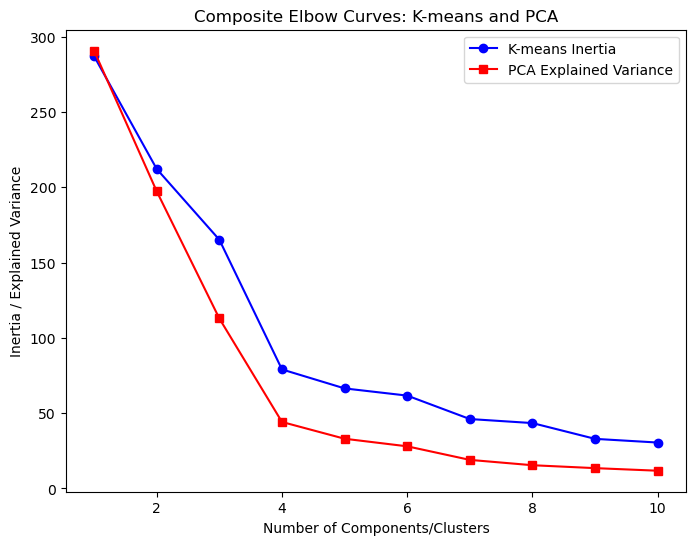

In [37]:
# Composite plot to contrast the Elbow curves
# df_elbow & elbow_plot_pca

# Create the figure and axis
plt.figure(figsize=(8, 6))

# Plot Elbow curve for K-means (from df_elbow)
plt.plot(df_elbow['k'], df_elbow['inertia'], 'o-', label='K-means Inertia', color='b')

# Plot Elbow curve for PCA (from elbow_plot_pca)
plt.plot(elbow_plot_pca['k'], elbow_plot_pca['inertia'], 's-', label='PCA Explained Variance', color='r')

# Add titles and labels
plt.title('Composite Elbow Curves: K-means and PCA')
plt.xlabel('Number of Components/Clusters')
plt.ylabel('Inertia / Explained Variance')

# Show legend
plt.legend()

# Display the plot
plt.show()


#### Answer the question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 

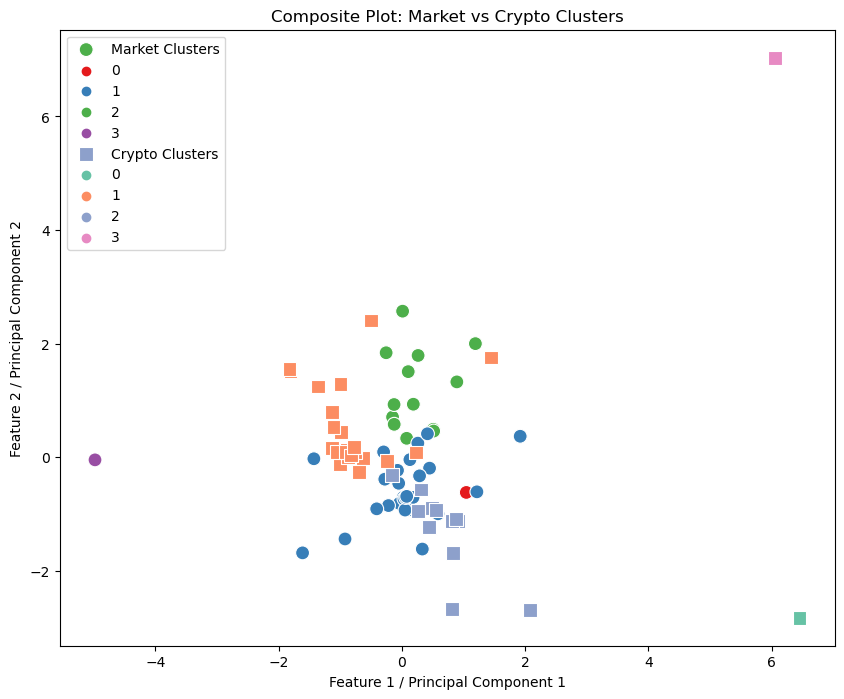

In [45]:
# Composite plot to contrast the clusters

# Create the figure and axes
plt.figure(figsize=(10, 8))

# Plot clusters for df_market_predictions (using two features or principal components, and circles for markers)
sns.scatterplot(x='price_change_percentage_24h', y='price_change_percentage_7d', 
                hue='cluster', data=df_market_predictions, 
                palette='Set1', s=100, 
                label='Market Clusters', marker='o')  # Circles

# Plot clusters for df_crypto_pca_predictions (using PC1 and PC2, and squares for markers)
sns.scatterplot(x='PC1', y='PC2', 
                hue='cluster', data=df_crypto_pca_predictions, 
                palette='Set2', s=100, 
                label='Crypto Clusters', marker='s')  # Squares

# Add plot titles and labels
plt.title('Composite Plot: Market vs Crypto Clusters')
plt.xlabel('Feature 1 / Principal Component 1')
plt.ylabel('Feature 2 / Principal Component 2')

# Show legend to differentiate between clusters from both datasets
plt.legend(loc='best')

# Display the plot
plt.show()
